In [1]:
import pandas as pd
import numpy as np
import datetime

# 导入必要的库
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# 计算基本的时域特征

def getTimeStatic(data):
    mean_values = np.mean(data, axis=1)  # 计算每个样本的均值
    std_dev_values = np.std(data, axis=1)  # 计算每个样本的标准差
    max_values = np.max(data, axis=1)  # 计算每个样本的最大值
    min_values = np.min(data, axis=1)  # 计算每个样本的最小值

    # 更复杂的时域特征
    # 均方根值（RMS）
    rms_values = np.sqrt(np.mean(data**2, axis=1))

    # 信号的峰值
    peak_values = max_values - min_values

    # 信号的形状指标（波形的峰度）
    shape_factor = rms_values / (np.abs(data).mean(axis=1))

    # 信号的脉冲指标（波形的峰值除以均方根值）
    impulse_factor = max_values / rms_values

    # 信号的裕度指标（波形的峰值除以平均绝对值）
    crest_factor = max_values / np.abs(data).mean(axis=1)

    # 计算每个样本的特征
    features = np.column_stack((mean_values, std_dev_values, max_values, 
                                min_values, rms_values, peak_values, 
                                shape_factor, impulse_factor, crest_factor))

    return features


In [3]:
df_train= pd.read_excel('./trainData.xlsx',engine='openpyxl')

In [4]:
train_data= getTimeStatic(df_train.iloc[:,0:4096].values)
df_train_=pd.DataFrame(data=train_data,columns=['mean_v','std_v','max_v','min_v','rms_v','peak_v','shape_v','impulse_factor','crest_v'])

In [5]:
df_train_clear=pd.merge(left=df_train,right=df_train_,left_index=True,right_index=True,how='inner')

In [6]:
df_train_clear.head(2)

,0,1,2,3,4,5,6,7,8,9,...,ladle,mean_v,std_v,max_v,min_v,rms_v,peak_v,shape_v,impulse_factor,crest_v
0,1.366090,0.569916,0.953181,-1.446556,-0.010715,-2.496672,-0.457135,-1.198446,0.337351,-0.011873,...,0,0.017151,1.317554,5.590916,-5.736414,1.317666,11.327330,1.313586,4.243046,5.573604
1,-0.237919,0.660790,0.163323,-0.983277,1.332190,-0.080136,1.073564,0.719082,-0.782411,-0.560653,...,0,0.014384,1.375377,8.833191,-8.392787,1.375453,17.225978,1.420337,6.422025,9.121439


In [7]:
df_train_factor=df_train_clear[['mean_v','std_v','max_v','min_v','rms_v','peak_v','shape_v','impulse_factor','crest_v','ladle']]

In [9]:
df_train_factor.head(2)

,mean_v,std_v,max_v,min_v,rms_v,peak_v,shape_v,impulse_factor,crest_v,ladle
0,0.017151,1.317554,5.590916,-5.736414,1.317666,11.327330,1.313586,4.243046,5.573604,0
1,0.014384,1.375377,8.833191,-8.392787,1.375453,17.225978,1.420337,6.422025,9.121439,0


In [23]:
# 这里以著名的Iris数据集为例
# x = df_train_factor.loc[:,['mean_v','std_v','max_v','min_v','rms_v','peak_v','shape_v','impulse_factor','crest_v']].values
x= df_train_factor.loc[:,['shape_v','impulse_factor','crest_v']]


y = df_train_factor.loc[:,'ladle'].values

In [24]:

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [33]:

# 创建随机森林分类器实例
clf = RandomForestClassifier(n_estimators=3, random_state=42,max_depth=5)
# 训练模型
clf.fit(X_train, y_train)
# 使用测试集进行预测
y_pred = clf.predict(X_test)

# 计算并打印准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'准确率: {accuracy:.2f}')

准确率: 0.66


In [13]:
## 加载测试集数据
df_test= pd.read_excel('./testData.xlsx',engine='openpyxl')

In [14]:
test_data= getTimeStatic(df_test.iloc[:,0:4096].values)
df_test_=pd.DataFrame(data=test_data,columns=['mean_v','std_v','max_v','min_v','rms_v','peak_v','shape_v','impulse_factor','crest_v'])

In [21]:
df_test_.describe()

,mean_v,std_v,max_v,min_v,rms_v,peak_v,shape_v,impulse_factor,crest_v
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.001211,5.333278,22.105217,-22.712611,5.333416,44.817827,1.287041,4.215803,5.480360
std,0.027122,10.679258,48.266353,51.045808,10.679223,98.937087,0.058975,1.075238,1.691995
min,-0.194296,0.091193,0.257801,-504.572305,0.091247,0.565131,1.147250,2.313389,2.711545
25%,-0.013417,1.313027,4.806870,-14.100472,1.313079,9.671690,1.252356,3.492215,4.375434
50%,-0.001353,1.351025,6.060297,-5.986351,1.351209,12.109586,1.261542,3.861269,4.862234
75%,0.011637,3.821784,14.770047,-4.864868,3.821846,29.344638,1.310354,4.601616,6.022923
max,0.186988,96.890583,481.924774,-0.290706,96.890602,962.660126,1.842936,9.039061,16.404600


In [22]:
df_train_factor.describe()

,mean_v,std_v,max_v,min_v,rms_v,peak_v,shape_v,impulse_factor,crest_v,ladle
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.000672,1.333927,5.638520,-5.617513,1.337839,11.256033,1.286163,4.204731,5.449236,1.500000
std,0.101355,0.073331,1.423099,1.479109,0.072100,2.803412,0.048410,0.971484,1.489221,1.118174
min,-0.560504,1.064842,3.425431,-12.686618,1.064932,6.946753,1.230996,2.526057,3.160767,0.000000
25%,-0.014098,1.305365,4.644441,-5.997659,1.310251,9.334201,1.251061,3.495002,4.373477,0.750000
50%,0.000396,1.335293,5.236086,-5.104036,1.337927,10.244030,1.264171,3.929870,4.995259,1.500000
75%,0.014645,1.360555,6.170663,-4.647220,1.363356,11.963292,1.312373,4.639289,6.057227,2.250000
max,0.636499,1.868044,12.128032,-3.433436,1.868179,24.814650,1.518248,8.458297,12.552740,3.000000


In [34]:
# Y_test=clf.predict(df_test_.loc[:,['mean_v','std_v','max_v','min_v','rms_v','peak_v','shape_v','impulse_factor','crest_v']].values)
Y_test=clf.predict(df_test_.loc[:,['shape_v','impulse_factor','crest_v']].values)

In [35]:
save_df=pd.DataFrame(Y_test)

In [29]:
len(save_df)

2000

In [37]:
save_df.to_csv('./result/result7.csv',index=False)

In [36]:
save_df[0].value_counts()

3    771
1    446
0    443
2    340
Name: 0, dtype: int64

In [38]:
import matplotlib.pyplot as plt

In [41]:
x=list(range(4096))

In [56]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,ladle
0,1.366090,0.569916,0.953181,-1.446556,-0.010715,-2.496672,-0.457135,-1.198446,0.337351,-0.011873,...,-1.058076,1.050433,-0.028264,-1.386564,-0.688467,-2.086440,0.422985,-0.324649,1.209361,0
1,-0.237919,0.660790,0.163323,-0.983277,1.332190,-0.080136,1.073564,0.719082,-0.782411,-0.560653,...,-1.229457,0.631306,-0.270907,0.254433,-0.168058,0.973841,0.002748,-0.077501,-0.256344,0
2,0.142828,-0.345052,-0.024745,0.240105,-0.144174,0.159029,0.369855,0.510930,0.692208,0.557021,...,-0.576049,-0.113310,0.663341,0.463385,-0.757272,0.026122,-1.308300,-1.529387,1.424421,0
3,-0.728323,-1.927840,-0.138924,-3.280840,-0.397378,-0.511843,0.782973,2.041306,1.292674,2.689035,...,-1.955793,-2.040622,-2.829535,-1.351996,0.099173,0.048115,0.909506,1.276646,3.475058,0
4,3.178863,2.051662,-0.823482,-0.077870,-0.171977,-1.722734,-0.532232,-1.104731,-1.413875,-0.448035,...,0.104451,-0.927895,-1.289735,-0.530023,0.326543,-0.362129,2.099529,0.011240,2.398554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.385472,-0.570981,-0.371500,0.746933,0.700367,-2.356816,-1.954524,-1.035698,-0.023995,-0.342583,...,0.847994,-0.284383,1.331887,2.129662,1.885746,-0.076673,-0.195513,-2.222365,0.930553,3
3996,-0.309299,-1.664031,-0.561411,-1.041487,-0.872799,0.116685,-1.309505,0.252289,-2.455736,-0.933510,...,0.205346,-1.908912,-0.149493,0.777793,-0.031090,-0.262353,-0.077625,-0.643535,1.664287,3
3997,0.408617,1.015413,0.086562,0.665675,-0.300791,-0.417479,-1.552031,-0.584162,-0.524849,0.691686,...,0.467192,1.603260,-0.437852,0.850299,0.591101,-1.234294,-0.597887,-0.304889,-0.151460,3
3998,-1.476962,-0.951101,0.484579,2.193726,2.041982,1.015791,-1.546587,-0.433869,-2.011038,-0.701589,...,-1.005039,1.621032,-0.567673,0.873702,0.633396,2.359651,3.388290,-0.228196,0.660822,3


In [62]:
y=df_train.iloc[10,:4096].values

In [60]:
y

array([-1.34440527,  0.31660209, -0.68053711, ..., -0.88038019,
       -0.62600894, -1.22903772])

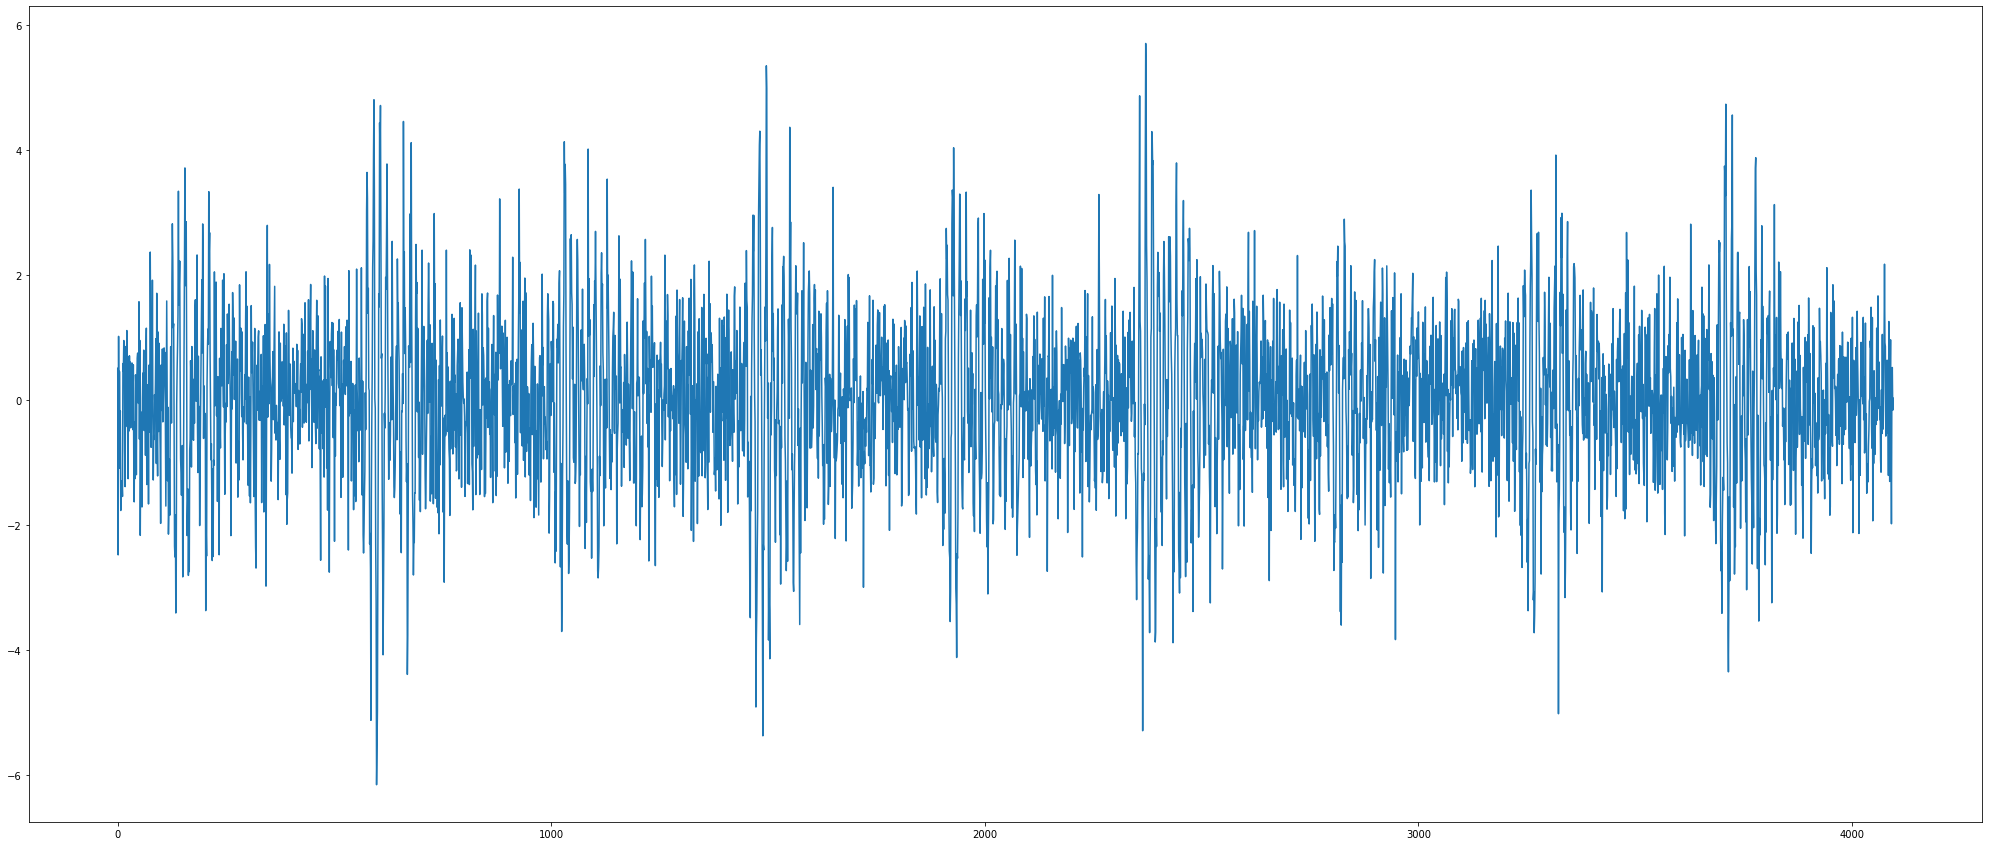

In [63]:
plt.figure(figsize=(35,15))
plt.plot(x,y)

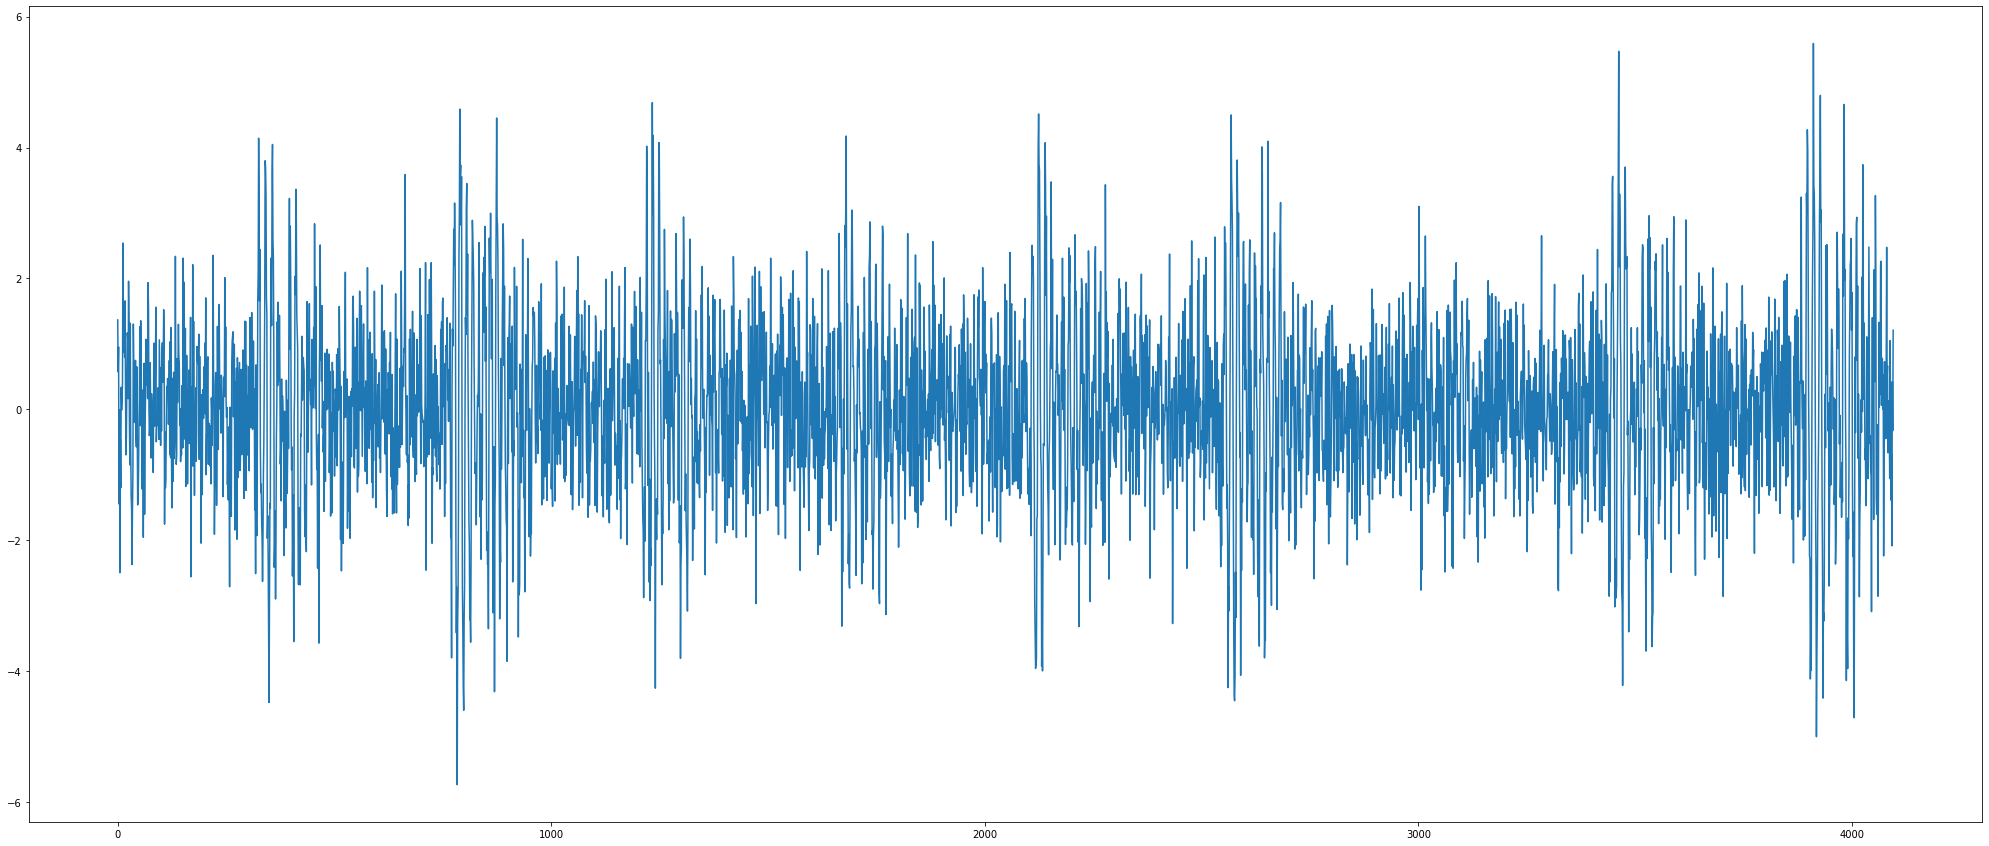

In [55]:
plt.figure(figsize=(35,15))
plt.plot(x,y)

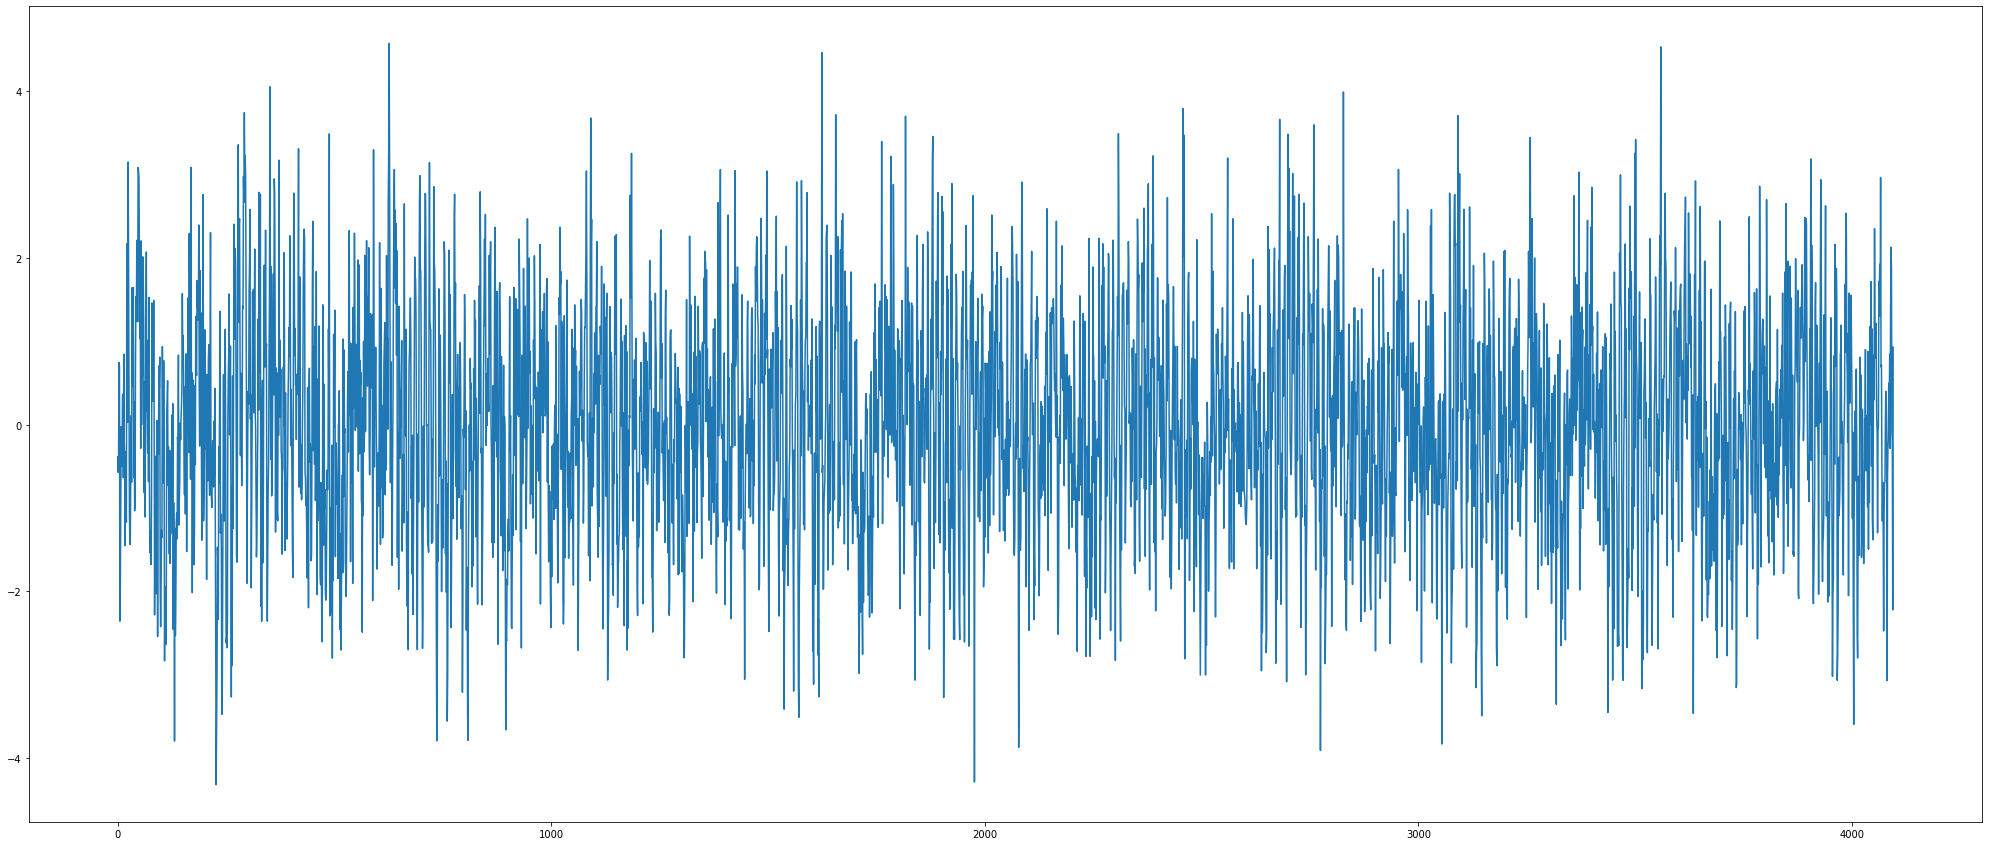

In [58]:
plt.figure(figsize=(35,15))
plt.plot(x,y)

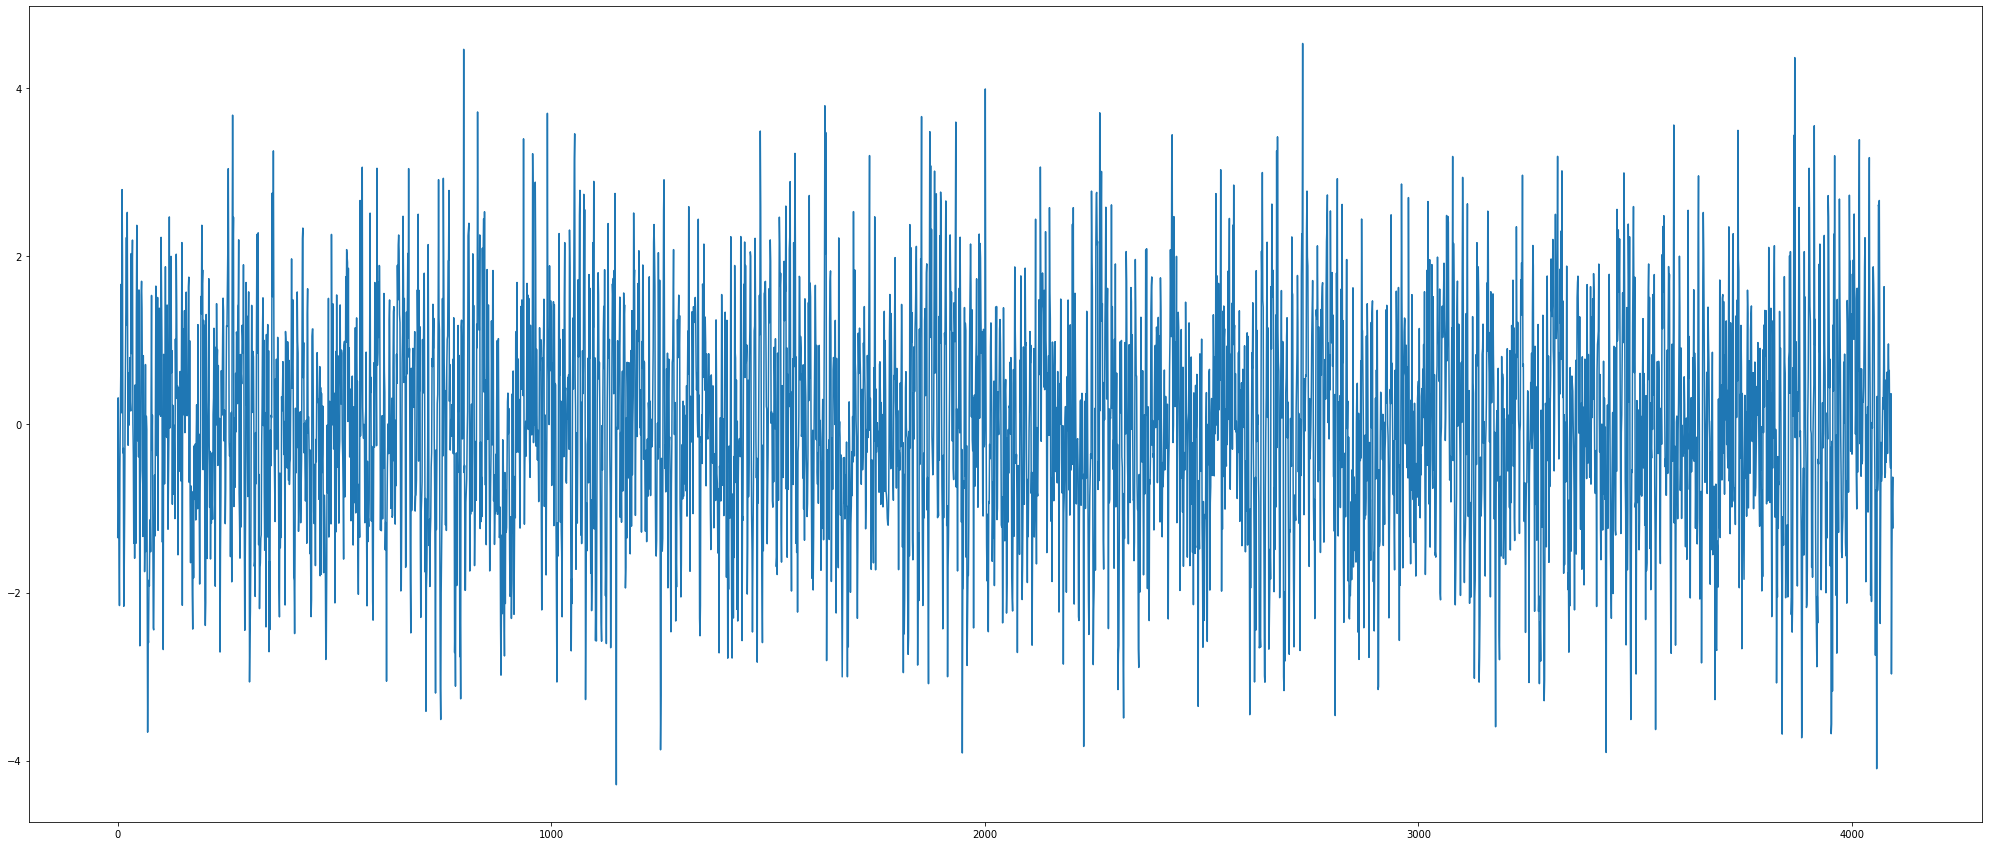

In [61]:
plt.figure(figsize=(35,15))
plt.plot(x,y)